## Load In Dependencies

In [2]:
# %pip install ImbalancedLearningRegression

In [3]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap
import folium

# Data Science
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Multi-dimensional arrays and datasets
import xarray as xr

# Geospatial raster data handling
import rioxarray as rxr

# Geospatial data analysis
import geopandas as gpd

# Geospatial operations
import rasterio
from rasterio import windows  
from rasterio import features  
from rasterio import warp
from rasterio.warp import transform_bounds 
from rasterio.windows import from_bounds 

# Image Processing
from PIL import Image

# Coordinate transformations
from pyproj import Proj, Transformer, CRS

# Feature Engineering
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold, RandomizedSearchCV

# Machine Learning
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

# Planetary Computer Tools
import pystac_client
import planetary_computer as pc
from pystac.extensions.eo import EOExtension as eo

# Others
import os
from tqdm import tqdm
import sys

from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor, XGBClassifier
from sklearn.preprocessing import MinMaxScaler, KBinsDiscretizer
from sklearn.feature_selection import RFE
from sklearn.mixture import GaussianMixture


import ImbalancedLearningRegression as iblr

In [4]:
sys.path.append(os.path.abspath("../ml_pipeline"))
import ml_models
save_folder = "../ml_pipeline/diagnostic_data/"

In [5]:
# Load the training data from csv file and display the first few rows to inspect the data
ground_df = pd.read_csv("../Training_data_uhi_index_2025-02-18.csv")
ground_df.head()

Longitude   Latitude          datetime  UHI Index
0 -73.909167  40.813107  24-07-2021 15:53   1.030289
1 -73.909187  40.813045  24-07-2021 15:53   1.030289
2 -73.909215  40.812978  24-07-2021 15:53   1.023798
3 -73.909242  40.812908  24-07-2021 15:53   1.023798
4 -73.909257  40.812845  24-07-2021 15:53   1.021634

In [6]:
data_folder = "../data_pipeline/data/tabular_data/train/1x1"
for i, filename in tqdm(enumerate(os.listdir(data_folder))):
    if filename.endswith(".csv"):
        file_path = os.path.join(data_folder, filename)
        df = pd.read_csv(file_path)
        df = df.iloc[:, 2:]
        ground_df = pd.concat([ground_df, df], axis=1)

data_folder = "../data_pipeline/data/tabular_data/train/3x3"
for i, filename in tqdm(enumerate(os.listdir(data_folder))):
    if filename.endswith(".csv"):
        file_path = os.path.join(data_folder, filename)
        df = pd.read_csv(file_path)
        df = df.iloc[:, 2:]
        ground_df = pd.concat([ground_df, df], axis=1)

data_folder = "../data_pipeline/data/tabular_data/train/5x5"
for i, filename in tqdm(enumerate(os.listdir(data_folder))):
    if filename.endswith(".csv"):
        file_path = os.path.join(data_folder, filename)
        df = pd.read_csv(file_path)
        df = df.iloc[:, 2:]
        ground_df = pd.concat([ground_df, df], axis=1)

data_folder = "../data_pipeline/data/tabular_data/train/9x9"
for i, filename in tqdm(enumerate(os.listdir(data_folder))):
    if filename.endswith(".csv"):
        file_path = os.path.join(data_folder, filename)
        df = pd.read_csv(file_path)
        df = df.iloc[:, 2:]
        ground_df = pd.concat([ground_df, df], axis=1)

data_folder = "../data_pipeline/data/tabular_data/train/15x15"
for i, filename in tqdm(enumerate(os.listdir(data_folder))):
    if filename.endswith(".csv"):
        file_path = os.path.join(data_folder, filename)
        df = pd.read_csv(file_path)
        df = df.iloc[:, 2:]
        ground_df = pd.concat([ground_df, df], axis=1)


data_folder = "../data_pipeline/data/tabular_data/train/25x25"
for i, filename in tqdm(enumerate(os.listdir(data_folder))):
    if filename.endswith(".csv"):
        file_path = os.path.join(data_folder, filename)
        df = pd.read_csv(file_path)
        df = df.iloc[:, 2:]
        ground_df = pd.concat([ground_df, df], axis=1)


data_folder = "../data_pipeline/data/tabular_data/train/51x51"
for i, filename in tqdm(enumerate(os.listdir(data_folder))):
    if filename.endswith(".csv"):
        file_path = os.path.join(data_folder, filename)
        df = pd.read_csv(file_path)
        df = df.iloc[:, 2:]
        ground_df = pd.concat([ground_df, df], axis=1)

0it [00:00, ?it/s]

48it [00:01, 31.67it/s]
73it [00:04, 14.85it/s]
71it [00:07,  9.53it/s]
71it [00:10,  7.10it/s]
63it [00:11,  5.25it/s]
29it [00:06,  4.69it/s]
29it [00:06,  4.16it/s]


In [7]:
list(ground_df.columns)

['Longitude',
 'Latitude',
 'datetime',
 'UHI Index',
 'aod47',
 'aod55',
 'building_height_res100',
 'building_height_std_res100',
 'building_year_res100',
 'building_area_res100',
 'building_height_res30',
 'building_height_std_res30',
 'building_year_res30',
 'building_area_res30',
 'var_res100',
 'building_area_per_pixel_res100',
 'var_res30',
 'building_area_per_pixel_res30',
 'Unnamed: 4',
 'canopy_heigth',
 'canopy_heigth_res10',
 'canopy_heigth_count_res10',
 'canopy_heigth_res30',
 'canopy_heigth_count_res30',
 'canopy_heigth_res5',
 'canopy_heigth_count_res5',
 'cooling_tower_res100',
 'cooling_tower_res1000',
 'cooling_tower_res30',
 'cooling_tower_res500',
 'co_july24',
 'segment_avg_length_res100',
 'segment_count_res100',
 'segment_total_length_res100',
 'degree_orientation_res100',
 'entropy_orientation_res100',
 'mean_circuity_res100',
 'segment_avg_length_res1000',
 'segment_count_res1000',
 'segment_total_length_res1000',
 'degree_orientation_res1000',
 'entropy_orien

In [8]:
len(ground_df.columns)

3235

In [9]:
col_prefix = ['aod55', 'o3', 'co', 'hcho', 'no2', 'building', 'var', 'street', 'has', 'overlay_level1_res30', 
              'zonedist_level1_res30', 'population', 'canopy', 
              'landsat_8_albedo', 'landsat_8_awei', 'lwir', 'landsat_8_ibi', 
            #   'landsat_8_ndvi', 'landsat_8_evi', 'landsat_8_savi', 'landsat_8_gndvi', 
              'landsat_8_arvi', 
            #   'landsat_8_msavi', 
              'landsat_8_ndbi', 
              'landsat_8_ndwi', 'landsat_8_si', 'landsat_8_ui',
              'connectivity', 'node_density', 'entropy_degree',  'closeness', 'intersection',
              'segment_avg_length', 'segment_count', 'segment_total_length', 'degree_orientation', 'entropy_orientation', 'mean_circuity',
              'surface', 'water', 'ventilation', 'subway_station', 'cooling_tower'
              ]

# col_suffix = []
cols = [col for col in ground_df.columns 
        if any(col.startswith(prefix) for prefix in col_prefix)
        # and not all(col.endswith(suffix) for suffix in col_suffix)
        ]


data = ground_df[cols + ['UHI Index']].copy()
drop_prefix = ['has', 'overlay', 'street_orientation', 'street_traffic', 'zonedist']
drop_suffix = ['3x3', '5x5', '9x9', '15x15', '25x25', '51x51']
drop_cols = [col for col in data.columns
    if (any(col.startswith(prefix) for prefix in drop_prefix) and any(col.endswith(suffix) for suffix in drop_suffix))
    or col.startswith('building_area_res')]

data = data.drop(columns=drop_cols)

categorical_cols = ['has_commercial_res100',
 'has_commercial_res1000',
 'has_commercial_res200',
 'has_commercial_res30',
 'has_commercial_res500',
 'has_manufacture_res100',
 'has_manufacture_res1000',
 'has_manufacture_res200',
 'has_manufacture_res30',
 'has_manufacture_res500',
 'has_park_res100',
 'has_park_res1000',
 'has_park_res200',
 'has_park_res30',
 'has_park_res500',
 'has_residence_res100',
 'has_residence_res1000',
 'has_residence_res200',
 'has_residence_res30',
 'has_residence_res500',
 'overlay_level1_res30',
 'street_orientation_res100',
 'street_orientation_res30',
 'street_traffic_res100',
 'street_traffic_res30',
 'zonedist_level1_res30']

numerical_cols = list(set(data.columns) - set(categorical_cols) - set(['UHI Index']))

In [10]:
col_lst = list(data.columns)
col_lst.sort()
col_lst

['UHI Index',
 'aod55',
 'aod55_ASM_15x15',
 'aod55_ASM_3x3',
 'aod55_ASM_5x5',
 'aod55_ASM_9x9',
 'aod55_contrast_15x15',
 'aod55_contrast_3x3',
 'aod55_contrast_5x5',
 'aod55_contrast_9x9',
 'aod55_correlation_15x15',
 'aod55_correlation_3x3',
 'aod55_correlation_5x5',
 'aod55_correlation_9x9',
 'aod55_dissimilarity_15x15',
 'aod55_dissimilarity_3x3',
 'aod55_dissimilarity_5x5',
 'aod55_dissimilarity_9x9',
 'aod55_energy_15x15',
 'aod55_energy_3x3',
 'aod55_energy_5x5',
 'aod55_energy_9x9',
 'aod55_homogeneity_15x15',
 'aod55_homogeneity_3x3',
 'aod55_homogeneity_5x5',
 'aod55_homogeneity_9x9',
 'aod55_mean_15x15',
 'aod55_mean_3x3',
 'aod55_mean_5x5',
 'aod55_mean_9x9',
 'aod55_std_dev_15x15',
 'aod55_std_dev_3x3',
 'aod55_std_dev_5x5',
 'aod55_std_dev_9x9',
 'building_area_per_pixel_res100',
 'building_area_per_pixel_res100_ASM_15x15',
 'building_area_per_pixel_res100_ASM_25x25',
 'building_area_per_pixel_res100_ASM_3x3',
 'building_area_per_pixel_res100_ASM_51x51',
 'building_area

In [11]:
import sys
import os

sys.path.append(os.path.abspath("../src"))
import eda
# from src.eda import EDA

stat_eda = eda.EDA(data)
stat_eda.explore_stats().to_csv('eda_features_selected.csv', index=False)

In [12]:
df3 = data[[col for col in data.columns if col.endswith("3x3")]].copy()
df5 = data[[col for col in data.columns if col.endswith("5x5")]].copy()
df9 = data[[col for col in data.columns if col.endswith("9x9")]].copy()
df15 = data[[col for col in data.columns if col.endswith("15x15")]].copy()
df25 = data[[col for col in data.columns if col.endswith("25x25")]].copy()
df51 = data[[col for col in data.columns if col.endswith("51x51")]].copy()

## Multi-staged modelling

In [13]:
col_prefix = ['canopy',
              'landsat_8_albedo', 
              'landsat_8_awei', 
              'lwir', 
              'landsat_8_ibi', 
              'landsat_8_arvi', 
              'landsat_8_ndbi', 
              'landsat_8_ndwi', 
              'landsat_8_si', 
        #       'landsat_8_ui', 
              'coastal', 
              # 'swir',
            #   'surface',
              ]

col_suffix = [
    'mean_51x51', 'std_dev_51x51', 'contrast_51x51', 'energy_51x51', 
        #       'dissimilarity_51x51', 
        # 'homogeneity_51x51', 
        # 'correlation_51x51', 
        'ASM_51x51',
              'mean_9x9', 'std_dev_9x9', 'contrast_9x9', 'energy_9x9',
              # 'dissimilarity_9x9', 
            # 'homogeneity_9x9', 
            # 'correlation_9x9', 
            'ASM_9x9',
            'mean_5x5', 'std_dev_5x5', 'contrast_5x5', 'energy_5x5',
              # 'dissimilarity_9x9', 
            # 'homogeneity_9x9', 
            # 'correlation_9x9', 
            'ASM_5x5',
              ]
numerical_cols = [col for col in data.columns 
        if any(col.startswith(prefix) for prefix in col_prefix)
        and any(col.endswith(suffix) for suffix in col_suffix)
        ]

others = ['building_height_res100', 'building_height_std_res100', 'building_year_res100', 'var_res100', 
          'building_area_per_pixel_res100', 
          'population_res1000', 
          'building_height_res100_mean_15x15', 'building_height_res100_std_dev_15x15', 
          'building_year_res100_mean_15x15', 
          'building_height_res100_mean_9x9', 'building_height_res100_std_dev_9x9', 
          'building_height_res100_mean_51x51', 'building_height_res100_std_dev_51x51', 
          'building_year_res100_mean_51x51', 'building_year_res100_mean_9x9', 
          'surface_elevation_res100', 
          'no2_july24', 'aod55', 'hcho_july24', 'co_july24', 'o3_july24',
          # 'water_area_res1000', 
          'water_area_res100', 
          'street_width_res100',
          'ventilation_res100',
          'subway_station_res100',
          'subway_station_res500',
          'subway_station_res1000',
          'water_area_res500', 
          'cooling_tower_res100',
          'cooling_tower_res500',
          # 'cooling_tower_res1000',
          # 'cooling_tower_res30',
          # 'water_area_res100',
  'closeness_1000_res100',
#  'closeness_1000_res1000',
#  'closeness_1000_res30',
#  'closeness_1000_res500',
 'closeness_100_res100',
#  'closeness_100_res1000',
#  'closeness_100_res30',
#  'closeness_100_res500',
 'closeness_500_res100',
#  'closeness_500_res1000',
#  'closeness_500_res30',
 'closeness_500_res500',
 'connectivity_res100',
 'connectivity_res1000',
#  'connectivity_res30',
 'connectivity_res500',
#  'degree_orientation_res100',
#  'degree_orientation_res1000',
#  'degree_orientation_res30',
#  'degree_orientation_res500',
#  'entropy_degree_res100',
#  'entropy_degree_res1000',
#  'entropy_degree_res30',
#  'entropy_degree_res500',
#  'entropy_orientation_res100',
 'entropy_orientation_res1000',
#  'entropy_orientation_res30',
 'entropy_orientation_res500',
 'intersection_res100',
#  'intersection_res1000',
#  'intersection_res30',
#  'intersection_res500',
 'mean_circuity_res100',
 'mean_circuity_res1000',
#  'mean_circuity_res30',
 'mean_circuity_res500',
#  'node_density_res100',
#  'node_density_res1000',
#  'node_density_res30',
#  'node_density_res500',
 'segment_avg_length_res100',
 'segment_avg_length_res1000',
 'segment_avg_length_res30',
 'segment_avg_length_res500',
#  'segment_count_res100',
#  'segment_count_res1000',
#  'segment_count_res30',
#  'segment_count_res500',
#  'segment_total_length_res100',
#  'segment_total_length_res1000',
#  'segment_total_length_res30',
#  'segment_total_length_res500'
          ]
numerical_cols = others + numerical_cols

categorical_cols = [
 'street_orientation_res30',
#  'street_traffic_res30',
#  'has_manufacture_res30',
#  'has_park_res30',
#  'has_residence_res30',
#  'has_commercial_res30',
 'has_manufacture_res100',
 'has_park_res100',
 'has_residence_res100',
 'has_commercial_res100',
# 'has_manufacture_res200',
#  'has_park_res200',
 'has_manufacture_res500',
 'has_park_res500',
 'has_residence_res500',
 'has_commercial_res500',
 'has_manufacture_res1000',
 'has_park_res1000',
#  'has_residence_res1000',
#  'has_commercial_res1000',
 ]

# numerical_cols = list(set(data.columns) - set(categorical_cols) - set(['UHI Index']))

In [14]:
len(numerical_cols)

243

In [15]:
list(data.columns)

['aod55',
 'building_height_res100',
 'building_height_std_res100',
 'building_year_res100',
 'building_height_res30',
 'building_height_std_res30',
 'building_year_res30',
 'var_res100',
 'building_area_per_pixel_res100',
 'var_res30',
 'building_area_per_pixel_res30',
 'canopy_heigth',
 'canopy_heigth_res10',
 'canopy_heigth_count_res10',
 'canopy_heigth_res30',
 'canopy_heigth_count_res30',
 'canopy_heigth_res5',
 'canopy_heigth_count_res5',
 'cooling_tower_res100',
 'cooling_tower_res1000',
 'cooling_tower_res30',
 'cooling_tower_res500',
 'co_july24',
 'segment_avg_length_res100',
 'segment_count_res100',
 'segment_total_length_res100',
 'degree_orientation_res100',
 'entropy_orientation_res100',
 'mean_circuity_res100',
 'segment_avg_length_res1000',
 'segment_count_res1000',
 'segment_total_length_res1000',
 'degree_orientation_res1000',
 'entropy_orientation_res1000',
 'mean_circuity_res1000',
 'segment_avg_length_res30',
 'segment_count_res30',
 'segment_total_length_res30',
 

In [16]:
train_data = data[['UHI Index'] + categorical_cols + numerical_cols]
train_data.duplicated().sum()

927

In [17]:
train_data.corr().to_csv("corr_street_node.csv")

In [18]:
train_data = train_data[['UHI Index'] + categorical_cols + numerical_cols].drop_duplicates()
# train_data = train_data[['UHI Index'] + categorical_cols + numerical_cols]

In [19]:
train_data

UHI Index  street_orientation_res30  has_manufacture_res100  \
0       1.030289                       1.0                     0.0   
1       1.030289                       1.0                     0.0   
2       1.023798                       1.0                     0.0   
3       1.023798                       1.0                     0.0   
4       1.021634                       1.0                     0.0   
...          ...                       ...                     ...   
11224   0.972470                       2.0                     0.0   
11225   0.972470                       2.0                     0.0   
11226   0.981124                       2.0                     0.0   
11227   0.981245                       2.0                     0.0   
11228   0.983408                       2.0                     0.0   

       has_park_res100  has_residence_res100  has_commercial_res100  \
0                  0.0                   1.0                    0.0   
1                  0.0                   1.0                    0.0   
2                  0.0                   1.0                    0.0   
3                  0.0                   1.0                    0.0   
4                  0.0                   1.0                    0.0   
...                ...                   ...                    ...   
11224              1.0                   0.0                    0.0   
11225              1.0                   0.0                    0.0   
11226              1.0                   0.0                    0.0   
11227              1.0                   0.0                    0.0   
11228              1.0                   0.0                    0.0   

       has_manufacture_res500  has_park_res500  has_residence_res500  \
0                         1.0              1.0                   1.0   
1                         1.0              1.0                   1.0   
2                         1.0              1.0                   1.0   
3                         1.0              1.0                   1.0   
4                         1.0              1.0                   1.0   
...                       ...              ...                   ...   
11224                     0.0              1.0                   1.0   
11225                     0.0              1.0                   0.0   
11226                     0.0              1.0                   0.0   
11227                     0.0              1.0                   0.0   
11228                     0.0              1.0                   0.0   

       has_commercial_res500  ...  coastal_std_dev_51x51  \
0                        0.0  ...               0.048565   
1                        0.0  ...               0.048565   
2                        0.0  ...               0.049500   
3                        0.0  ...               0.049500   
4                        0.0  ...               0.049500   
...                      ...  ...                    ...   
11224                    0.0  ...               0.039027   
11225                    0.0  ...               0.039027   
11226                    0.0  ...               0.039027   
11227                    0.0  ...               0.039027   
11228                    0.0  ...               0.039027   

       lwir11_std_dev_51x51  landsat_8_arvi_std_dev_51x51  \
0                  2.024355                      0.221423   
1                  2.024355                      0.221423   
2                  2.034063                      0.221130   
3                  2.034063                      0.221130   
4                  2.034063                      0.221130   
...                     ...                           ...   
11224              3.936140                      0.400795   
11225              3.936140                      0.400795   
11226              3.936140                      0.400795   
11227              3.936140                      0.400795   
11228              3.936140                      0.40079

In [20]:
from sklearn.model_selection import train_test_split

bins = pd.cut(train_data['UHI Index'], bins=50)
X_train, X_test, y_train, y_test = train_test_split(train_data.drop(columns=['UHI Index']), train_data['UHI Index'],
                                                    test_size=0.3, random_state=33,
                                                    stratify=bins)


In [21]:
y_train

6368     0.993866
9115     1.020071
3733     1.002401
11026    0.976196
5020     0.992304
           ...   
7498     1.017427
5517     0.978480
9290     1.010214
87       1.015383
5104     1.012138
Name: UHI Index, Length: 7211, dtype: float64

In [22]:
# Step 1: Create a combined DataFrame with both features and target
combined_train = X_train.copy()
combined_train["UHI Index"] = y_train  # Use values to avoid index issues

# Step 2: Reset the index to ensure continuous integer indices from 0
combined_train = combined_train.reset_index(drop=True)

In [23]:
combined_train

street_orientation_res30  has_manufacture_res100  has_park_res100  \
0                          3.0                     0.0              0.0   
1                          2.0                     0.0              0.0   
2                          2.0                     0.0              0.0   
3                          3.0                     0.0              1.0   
4                          2.0                     1.0              0.0   
...                        ...                     ...              ...   
7206                       0.0                     1.0              0.0   
7207                       2.0                     0.0              0.0   
7208                       3.0                     0.0              0.0   
7209                       1.0                     1.0              0.0   
7210                       0.0                     0.0              0.0   

      has_residence_res100  has_commercial_res100  has_manufacture_res500  \
0                      1.0                    0.0                     0.0   
1                      1.0                    0.0                     0.0   
2                      1.0                    0.0                     0.0   
3                      0.0                    0.0                     0.0   
4                      0.0                    1.0                     1.0   
...                    ...                    ...                     ...   
7206                   1.0                    0.0                     1.0   
7207                   1.0                    1.0                     0.0   
7208                   1.0                    0.0                     0.0   
7209                   0.0                    0.0                     1.0   
7210                   1.0                    0.0                     1.0   

      has_park_res500  has_residence_res500  has_commercial_res500  \
0                 1.0                   1.0                    1.0   
1                 0.0                   1.0                    1.0   
2                 1.0                   1.0                    0.0   
3                 1.0                   0.0                    0.0   
4                 1.0                   1.0                    1.0   
...               ...                   ...                    ...   
7206              0.0                   1.0                    0.0   
7207              0.0                   1.0                    1.0   
7208              0.0                   1.0                    1.0   
7209              0.0                   1.0                    0.0   
7210              1.0                   1.0                    1.0   

      has_manufacture_res1000  ...  lwir11_std_dev_51x51  \
0                         0.0  ...              3.605808   
1                         0.0  ...              2.684805   
2                         1.0  ...              1.686221   
3                         0.0  ...              3.382328   
4                         1.0  ...              1.636909   
...                       ...  ...                   ...   
7206                      1.0  ...              2.427256   
7207                      0.0  ...              4.433601   
7208                      0.0  ...              1.902992   
7209                      1.0  ...              4.519108   
7210                      1.0  ...              1.883400   

      landsat_8_arvi_std_dev_51x51  landsat_8_ndwi_std_dev_51x51  \
0                         0.224278                      0.224801   
1                         0.257429                      0.198798   
2                         0.165709                      0.137624   
3                         0.343617                      0.267172   
4                         0.173216                      0.139525   
...                            ...                           ...   
7206                      0.143878                      0.121229   
7207                      0.288190                      0.272324   
7208  

In [ ]:
bins = bins[X_test.index]
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test,
                                                test_size=0.5, random_state=33,
                                                stratify=bins)

# X_train = train_set.drop(columns='UHI Index')
df_train = X_train.copy()
df_train['y_true'] = y_train.values

df_val = X_val.copy()
df_val['y_true'] = y_val.values
df_test = X_test.copy()
df_test['y_true'] = y_test.values

train_idx = df_train.index
val_idx = df_val.index
test_idx = df_test.index

### Stacking

In [32]:
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, PowerTransformer
from sklearn.compose import ColumnTransformer

def power_transform_exclude_neg1(X):
    X = X.copy()
    mask = X == 0  # Identify -1 values
    X[mask] = np.nan  # Temporarily replace -1 with NaN
    X = PowerTransformer().fit_transform(X)  # Apply PowerTransformer
    X[mask] = -10  # Restore -1 values
    return X

def create_feature_engineering_pipeline(numerical_features, categorical_features):
    # power_trans = ColumnTransformer([
    #     ('power', FunctionTransformer(power_transform_exclude_neg1), power_cols),  # Power transform with exclusion
    #     ('identity', FunctionTransformer(), list(set(numerical_features) - set(power_cols)))  # Keep other columns unchanged
    # ])

    num_transformer = Pipeline([
        # ('preprocessing', power_trans),
        ("scaler", MinMaxScaler())
    ])

    cat_transformer = Pipeline([
        ("encoder", OneHotEncoder(drop='first'))
    ])

    preprocessor = ColumnTransformer([
        ("num", num_transformer, numerical_features),
        ("cat", cat_transformer, categorical_features)
    ])

    return preprocessor


# Extract feature names after transformation
def get_feature_names(preprocessor, numerical_features, categorical_features):
    # Get names of numerical features (unchanged)
    num_features_out = numerical_features

    # Get names of categorical features after one-hot encoding
    cat_pipeline = preprocessor.named_transformers_["cat"]
    cat_encoder = cat_pipeline.named_steps["encoder"]
    cat_feature_names = cat_encoder.get_feature_names_out(categorical_features)

    # Combine all feature names
    return np.concatenate([num_features_out, cat_feature_names])

In [33]:
import joblib

df_train = pd.read_csv("train_no_commercial.csv", index_col="Unnamed: 0")
df_val = pd.read_csv("val_no_commercial.csv", index_col="Unnamed: 0")
df_test = pd.read_csv("test_no_commercial.csv", index_col="Unnamed: 0")

X_train = df_train.drop(columns=['y_true', 'y_pred'])
X_val = df_val.drop(columns=['y_true', 'y_pred'])
X_test = df_test.drop(columns=['y_true', 'y_pred'])

y_train = df_train['y_true']
y_val = df_val['y_true']
y_test = df_test['y_true']

categorical_cols = [
 'street_orientation_res30',
 'street_traffic_res30',
 'has_manufacture_res30',
 'has_park_res30',
 'has_manufacture_res100',
 'has_park_res100',
 'has_manufacture_res500',
 'has_park_res500',
 'has_manufacture_res1000',
 'has_park_res1000',
 ]

numerical_cols = list(set(df_train.columns) - set(categorical_cols) - set(['y_pred', 'y_true']))

# extree_pl = joblib.load('extree')


In [38]:
X_train

canopy_heigth_res30_contrast_9x9  canopy_heigth_res30_energy_9x9  \
10395                                 0                               0   
11186                                 4                               0   
1785                                  6                               0   
9915                                  0                               0   
4867                                  3                               0   
...                                 ...                             ...   
1976                                  0                               0   
9222                                  0                               0   
9829                                  7                               0   
10040                                 0                               0   
10284                                 2                               0   

       canopy_heigth_count_res30_contrast_9x9  \
10395                                       0   
11186                                       0   
1785                                       14   
9915                                        0   
4867                                        7   
...                                       ...   
1976                                        0   
9222                                        3   
9829                                       10   
10040                                       3   
10284                                       0   

       canopy_heigth_count_res30_energy_9x9  coastal_contrast_9x9  \
10395                                     1               0.28125   
11186                                     1               0.00000   
1785                                      0               0.00000   
9915                                      1               0.37500   
4867                                      0               0.25000   
...                                     ...                   ...   
1976                                      1               0.18750   
9222                                      0               0.15625   
9829                                      0               0.37500   
10040                                     0               0.40625   
10284                                     1               0.31250   

       coastal_energy_9x9  lwir11_contrast_9x9  lwir11_energy_9x9  \
10395            0.688565             0.437500           0.438336   
11186            1.000000             0.062500           0.892952   
1785             1.000000             0.234375           0.651302   
9915             0.522913             0.328125           0.529639   
4867             0.686078             0.390625           0.362588   
...                   ...                  ...                ...   
1976             0.807980             0.281250           0.457415   
9222             0.691395             0.484375           0.375813   
9829             0.532168             0.421875           0.444558   
10040            0.510629             0.046875           0.908067   
10284            0.652893             0.218750           0.562717   

       landsat_8_arvi_contrast_9x9  landsat_8_arvi_energy_9x9  ...  \
10395                     0.671875                   0.508593  ...   
11186                     1.500000                   0.423608  ...   
1785                      0.437500                   0.474187  ...   
9915                      0.562500                   0.493117  ...   
4867                      1.265625                   0.346755  ...   
...                            ...                        ...  ...   
1976                      0.437500                   0.567147  ...   
9222                      0.546875                   0.516098  ...   
9829                      1.828125                   0.355619  ...   
10040                     0.578125                   0.475216  ...   
10284                     1.828125                   0.266543  ...   

       street_orie

In [ ]:
df_train

street_orientation_res30  ...    y_true
6368                        3.0  ...  0.993866
9115                        2.0  ...  1.020071
3733                        2.0  ...  1.002401
11026                       3.0  ...  0.976196
5020                        2.0  ...  0.992304
...                         ...  ...       ...
7498                        0.0  ...  1.017427
5517                        2.0  ...  0.978480
9290                        3.0  ...  1.010214
87                          1.0  ...  1.015383
5104                        0.0  ...  1.012138

[7211 rows x 255 columns]

In [34]:
## Best XGBoost
import random

random.shuffle(numerical_cols)

preprocessor = create_feature_engineering_pipeline(numerical_cols, categorical_cols)

# preprocessor = MinMaxScaler()

# iter = [500, 1000, 2000, 5000, 7000]
# lr = [0.001, 0.005, 0.007, 0.01, 0.05]
# depth = [4, 6, 8, 10, 12, 15]

# for i in iter:
#     for l in lr:
#         for d in depth:
#             print(f"iter {i}, lr {l}, depth {d}")


xgb3 = XGBRegressor(
    # objective="reg:pseudohubererror", huber_slope=1, eval_metric=['rmse'],
                    n_estimators=3000, learning_rate=0.01, 
                    max_depth=10, min_child_weight=4, 
                    colsample_bytree=0.6, subsample=0.8, random_state=42
                    )

# xgb3 = LGBMRegressor(n_estimators=2000, learning_rate=0.05, max_depth=25, random_state=42)

# feat_selector3 = RFE(xgb3, n_features_to_select=150, step=2, verbose=1)

rfe_pipeline3 = Pipeline([
                        ("preprocessor", preprocessor),
                        ("rfe", xgb3)
                    ])


param_distributions = {
    "rfe__n_estimators": [500, 1000, 2000, 3000, 5000],
    "rfe__learning_rate": [0.001, 0.005, 0.007, 0.01, 0.03, 0.05],
    # "rfe__max_depth": [6, 8, 10, 12, 15],
    # "rfe__min_child_weight": [1, 2, 4, 6, 8],
    # "rfe__colsample_bytree": [0.6, 0.7, 0.8, 0.9, 1.0],
    # "rfe__subsample": [0.6, 0.7, 0.8, 0.9, 1.0],
    # "rfe__gamma": [0, 0.1, 0.2, 0.5],
    # "rfe__reg_alpha": [0, 0.1, 0.5, 1.0],
    # "rfe__reg_lambda": [0.1, 0.5, 1.0, 5.0],
}


# Set up grid search with cross-validation
# grid_search = GridSearchCV(estimator=rfe_pipeline3, param_grid=param_distributions, cv=5, scoring="r2", verbose=2, n_jobs=-1)

# # Create bins for stratification (for regression problems)
# n_bins = 50  # You can adjust this based on your data
# binner = KBinsDiscretizer(n_bins=n_bins, encode="ordinal", strategy="quantile")
# y_binned = binner.fit_transform(df_train[["y_true"]]).astype(int).ravel()

# # Create stratified k-fold
# stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Set up RandomizedSearchCV with stratification
# random_search = RandomizedSearchCV(
#     estimator=rfe_pipeline3,
#     param_distributions=param_distributions,
#     n_iter=500,  # Number of parameter settings that are sampled
#     cv=stratified_kfold.split(X_train, y_binned),  # Use the stratified k-fold
#     scoring="r2",
#     random_state=42,
#     verbose=10,
#     n_jobs=6,
# )

# grid_search = GridSearchCV(
#     estimator=rfe_pipeline3,
#     param_grid=param_distributions,
#     # n_iter=500,  # Number of parameter settings that are sampled
#     cv=stratified_kfold.split(X_train, y_binned),  # Use the stratified k-fold
#     scoring="r2",
#     verbose=3,
#     n_jobs=6,
# )

rfe_pipeline3.fit(X_train, df_train["y_true"])
df_train['y_pred_xgb'] = rfe_pipeline3.predict(X_train)
print(f"Train: {r2_score(df_train['y_true'], df_train['y_pred_xgb'])}")
df_val['y_pred_xgb'] = rfe_pipeline3.predict(X_val)
print(f"Val: {r2_score(df_val['y_true'], df_val['y_pred_xgb'])}")
df_test['y_pred_xgb'] = rfe_pipeline3.predict(X_test)
print(f"Test: {r2_score(df_test['y_true'], df_test['y_pred_xgb'])}")

Train: 0.9954357398700342
Val: 0.9616123557880433
Test: 0.9624280765427066


In [36]:
param_distributions = {
    "rfe__n_estimators": [500, 1000, 2000, 3000, 5000],
    "rfe__max_depth": [None, 20, 40, 60, 80, 100],
    "rfe__min_samples_split": [2, 5, 10],
    "rfe__min_samples_leaf": [1, 2, 4],
    "rfe__max_features": ["sqrt", "log2", 0.3, 0.5, 0.7, None],
    "rfe__bootstrap": [True, False],
    "rfe__random_state": [42],
}

# Create bins for stratification (for regression problems)
n_bins = 10  # You can adjust this - smaller bins for more granular stratification
binner = KBinsDiscretizer(n_bins=n_bins, encode="ordinal", strategy="quantile")
y_binned = binner.fit_transform(df_train[["y_true"]]).astype(int).ravel()

# Create stratified k-fold
n_splits = 5
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Set up RandomizedSearchCV with stratification
random_search = RandomizedSearchCV(
    estimator=Pipeline([("preprocessor", preprocessor), ("rfe", ExtraTreesRegressor())]),
    param_distributions=param_distributions,
    n_iter=30,  # Adjust based on your computational resources
    cv=stratified_kfold.split(X_train, y_binned),
    scoring="r2",
    random_state=42,
    verbose=2,
    n_jobs=-1,  # Use all available cores
)

In [37]:
random_search.fit(X_train, df_train["y_true"])

Fitting 5 folds for each of 30 candidates, totalling 150 fits


KeyboardInterrupt: 

In [ ]:
# cv_results = pd.DataFrame(random_search.cv_results_)
# cv_results

mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
0     1978.181776    272.746337  ...             NaN               27
1       16.950451      1.208283  ...        0.001866               22
2     1079.765021     25.435999  ...        0.002099               18
3       16.164572      1.393298  ...        0.001866               22
4       21.172681      3.266630  ...        0.001945               19
5      344.947107     28.062110  ...        0.002491               10
6      180.189103      7.003265  ...        0.002315                9
7      311.630720     11.111404  ...             NaN               27
8      274.558014      7.413552  ...        0.002431               12
9      561.371305     18.590486  ...        0.002416               13
10      11.626252      0.414217  ...        0.001761               26
11     195.090157      1.217450  ...        0.002105               24
12     287.755689     10.277425  ...        0.002745                4
13     416.438817     16.196249  ...        0.002752                3
14    1765.569009     59.449327  ...        0.002536                6
15      50.392045      1.833786  ...        0.002104               25
16      16.911170      0.752846  ...        0.001660               14
17    2316.918759    104.220102  ...        0.002745                7
18     638.402270     23.106686  ...        0.002902                1
19      81.854452      1.554761  ...        0.002286               20
20     723.372822    200.042554  ...             NaN               27
21     180.825373     61.060095  ...             NaN               27
22     132.887797      5.261342  ...        0.002766                8
23      87.200710      6.829350  ...        0.002515               15
24    1408.070787     81.488954  ...        0.002681                5
25     541.406973     27.775993  ...        0.002427               17
26    1214.573406     46.088523  ...        0.002573               11
27      37.231838      1.540526  ...        0.001790               21
28     182.786847      2.973804  ...        0.003126                2
29     350.087115     39.643993  ...        0.002289               16

[30 rows x 20 columns]

In [ ]:
# extree_pl = random_search.best_estimator_

In [27]:
# extree_pl = Pipeline([("preprocessor", preprocessor), ("rfe", extra_tree)])
# extree_pl.fit(X_train, df_train["y_true"])

df_train["y_pred_extree"] = extree_pl.predict(X_train)
print(f"Train: {r2_score(df_train['y_true'], df_train['y_pred_extree'])}")
df_val["y_pred_extree"] = extree_pl.predict(X_val)
print(f"Val: {r2_score(df_val['y_true'], df_val['y_pred_extree'])}")
df_test["y_pred_extree"] = extree_pl.predict(X_test)
print(f"Test: {r2_score(df_test['y_true'], df_test['y_pred_extree'])}")

ValueError: columns are missing: {'cooling_tower_res500', 'canopy_heigth_count_res5_std_dev_5x5', 'ventilation_res100', 'closeness_500_res100', 'landsat_8_awei_nsh_energy_5x5', 'connectivity_res500', 'landsat_8_ndbi_ASM_9x9', 'intersection_res100', 'landsat_8_ndwi_mean_5x5', 'segment_avg_length_res1000', 'landsat_8_awei_nsh_mean_5x5', 'has_commercial_res500', 'coastal_contrast_5x5', 'lwir11_energy_5x5', 'landsat_8_ibi_ASM_51x51', 'landsat_8_albedo_contrast_5x5', 'subway_station_res1000', 'connectivity_res100', 'canopy_heigth_res5_std_dev_5x5', 'landsat_8_ibi_contrast_5x5', 'mean_circuity_res500', 'landsat_8_awei_nsh_ASM_9x9', 'canopy_heigth_res30_energy_5x5', 'canopy_heigth_res10_mean_5x5', 'landsat_8_si_ASM_9x9', 'landsat_8_si_ASM_5x5', 'landsat_8_ndwi_ASM_5x5', 'landsat_8_awei_sh_contrast_5x5', 'landsat_8_awei_sh_ASM_51x51', 'landsat_8_ndbi_energy_5x5', 'canopy_heigth_count_res30_energy_5x5', 'canopy_heigth_count_res30_ASM_9x9', 'landsat_8_ibi_ASM_5x5', 'landsat_8_si_std_dev_5x5', 'canopy_heigth_res30_std_dev_5x5', 'landsat_8_ibi_mean_5x5', 'has_residence_res500', 'street_width_res100', 'coastal_ASM_5x5', 'landsat_8_albedo_mean_5x5', 'water_area_res100', 'closeness_500_res500', 'landsat_8_awei_sh_ASM_9x9', 'canopy_heigth_count_res30_mean_5x5', 'canopy_heigth_res5_mean_5x5', 'landsat_8_albedo_std_dev_5x5', 'o3_july24', 'landsat_8_awei_nsh_ASM_5x5', 'landsat_8_albedo_ASM_51x51', 'coastal_energy_5x5', 'landsat_8_ibi_ASM_9x9', 'landsat_8_ibi_energy_5x5', 'canopy_heigth_count_res10_mean_5x5', 'landsat_8_awei_sh_mean_5x5', 'coastal_mean_5x5', 'landsat_8_arvi_std_dev_5x5', 'landsat_8_ndbi_ASM_5x5', 'canopy_heigth_count_res5_mean_5x5', 'landsat_8_albedo_energy_5x5', 'landsat_8_ndbi_mean_5x5', 'canopy_heigth_res30_ASM_51x51', 'segment_avg_length_res30', 'landsat_8_albedo_ASM_9x9', 'landsat_8_ndwi_contrast_5x5', 'landsat_8_si_contrast_5x5', 'coastal_ASM_9x9', 'mean_circuity_res1000', 'landsat_8_si_mean_5x5', 'has_residence_res100', 'aod55', 'coastal_std_dev_5x5', 'hcho_july24', 'canopy_heigth_res30_contrast_5x5', 'canopy_heigth_res30_mean_5x5', 'landsat_8_awei_sh_std_dev_5x5', 'landsat_8_awei_nsh_contrast_5x5', 'lwir11_std_dev_5x5', 'landsat_8_awei_nsh_std_dev_5x5', 'landsat_8_awei_sh_energy_5x5', 'landsat_8_awei_nsh_ASM_51x51', 'landsat_8_ibi_std_dev_5x5', 'canopy_heigth_res30_ASM_9x9', 'entropy_orientation_res500', 'canopy_heigth_res30_ASM_5x5', 'closeness_100_res100', 'lwir11_ASM_9x9', 'landsat_8_si_energy_5x5', 'connectivity_res1000', 'entropy_orientation_res1000', 'co_july24', 'landsat_8_arvi_mean_5x5', 'subway_station_res100', 'lwir11_ASM_5x5', 'closeness_1000_res100', 'landsat_8_ndwi_std_dev_5x5', 'water_area_res500', 'surface_elevation_res100', 'canopy_heigth_count_res30_std_dev_5x5', 'canopy_heigth_count_res30_ASM_51x51', 'landsat_8_ndbi_ASM_51x51', 'landsat_8_arvi_ASM_9x9', 'canopy_heigth_count_res10_std_dev_5x5', 'landsat_8_ndwi_ASM_51x51', 'landsat_8_ndbi_contrast_5x5', 'coastal_ASM_51x51', 'landsat_8_awei_sh_ASM_5x5', 'landsat_8_albedo_ASM_5x5', 'landsat_8_arvi_ASM_51x51', 'mean_circuity_res100', 'landsat_8_ndwi_ASM_9x9', 'segment_avg_length_res500', 'canopy_heigth_count_res30_contrast_5x5', 'landsat_8_arvi_ASM_5x5', 'no2_july24', 'lwir11_contrast_5x5', 'lwir11_ASM_51x51', 'canopy_heigth_res10_std_dev_5x5', 'landsat_8_ndwi_energy_5x5', 'has_commercial_res100', 'lwir11_mean_5x5', 'landsat_8_arvi_energy_5x5', 'landsat_8_arvi_contrast_5x5', 'cooling_tower_res100', 'subway_station_res500', 'canopy_heigth_count_res30_ASM_5x5', 'landsat_8_si_ASM_51x51', 'landsat_8_ndbi_std_dev_5x5', 'segment_avg_length_res100'}

In [ ]:
import joblib

joblib.dump(extree_pl, 'extree')

['extree']

In [ ]:
preprocessor = create_feature_engineering_pipeline(numerical_cols, categorical_cols)

# preprocessor = MinMaxScaler()

iter = [500, 1000, 2000, 5000, 7000]
lr = [0.001, 0.005, 0.007, 0.01, 0.05]
# depth = [8, 12, 15, -1]
# num_leaves = [15, 31, 63, 98, 127]
sample = [0.2, 0.4, 0.6, 0.8]

# 1000 0.05
# 5000 0.01


# for i in iter:
#     for l in lr:
lgbm3 = LGBMRegressor(
    n_estimators=1000, learning_rate=0.05, max_depth=15, num_leaves=31, 
                        min_data_in_leaf=20,
                    colsample_bytree=0.8,
                    random_state=42, verbose=-1
                    )

# feat_selector3 = RFE(xgb3, step=10)

param_distributions = {
    "rfe__n_estimators": [500, 1000, 2000, 5000, 7000],
    "rfe__learning_rate": [0.001, 0.005, 0.007, 0.01, 0.05],
    # "rfe__max_depth": [8, 10, 12, 15, -1],  # -1 means no limit
    # "rfe__num_leaves": [15, 31, 63, 127, 255],
    # "rfe__min_child_samples": [5, 10, 20, 50],
    # "rfe__subsample": [0.6, 0.7, 0.8, 0.9, 1.0],
    # "rfe__colsample_bytree": [0.6, 0.7, 0.8, 0.9, 1.0],
    # "rfe__reg_alpha": [0, 0.1, 0.5, 1.0],
    # "rfe__reg_lambda": [0, 0.1, 0.5, 1.0],
}

lgbm_pipeline3 = Pipeline([
                        ("preprocessor", preprocessor),
                        ("rfe", lgbm3)
                    ])

# random_search = RandomizedSearchCV(
#     estimator=lgbm_pipeline3,
#     param_distributions=param_distributions,
#     n_iter=150,  # Number of parameter settings that are sampled
#     cv=stratified_kfold.split(X_train, y_binned),  # Use the stratified k-fold
#     scoring="r2",
#     random_state=42,
#     verbose=3,
#     n_jobs=6,
# )

# best_lgbm_model = random_search.best_estimator_
# best_lgbm_model.fit(X_train, df_train['y_true'])

In [ ]:
lgbm_pipeline3.fit(X_train, df_train['y_true'])

df_train['y_pred_lgb'] = lgbm_pipeline3.predict(X_train)

print(f"Train: {r2_score(df_train['y_true'], df_train['y_pred_lgb'])}")

df_val['y_pred_lgb'] = lgbm_pipeline3.predict(X_val)

print(f"Val: {r2_score(df_val['y_true'], df_val['y_pred_lgb'])}")

df_test['y_pred_lgb'] = lgbm_pipeline3.predict(X_test)

print(f"Test: {r2_score(df_test['y_true'], df_test['y_pred_lgb'])}")

  File "d:\HW & Project\EY Challenge\ey_challenge\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


Train: 0.9923970739565624
Val: 0.9588753610712595
Test: 0.961302247453777


In [ ]:
# joblib.dump(lgbm_pipeline3, 'stacked_lgbm')

In [ ]:
p = 0.9

pred_train = p * df_train['y_pred_extree'] + (1 - p) * df_train['y_pred_xgb']
print(f"Train: {r2_score(df_train['y_true'], pred_train)}")
pred_val = p * df_val['y_pred_extree'] + (1 - p) * df_val['y_pred_xgb']
print(f"Val: {r2_score(df_val['y_true'], pred_val)}")
pred_test = p * df_test['y_pred_extree'] + (1 - p) * df_test['y_pred_xgb']
print(f"Test: {r2_score(df_test['y_true'], pred_test)}")

Train: 0.9969474949878853
Val: 0.963376604788042
Test: 0.9652546852781263


In [ ]:
# import joblib

# joblib.dump(rfe_pipeline3, 'xgb_9_51_zoning_all_glcm_no_commercial')

In [ ]:
# df_train.to_csv("train_no_commercial.csv")
# df_val.to_csv("val_no_commercial.csv")
# df_test.to_csv("test_no_commercial.csv")

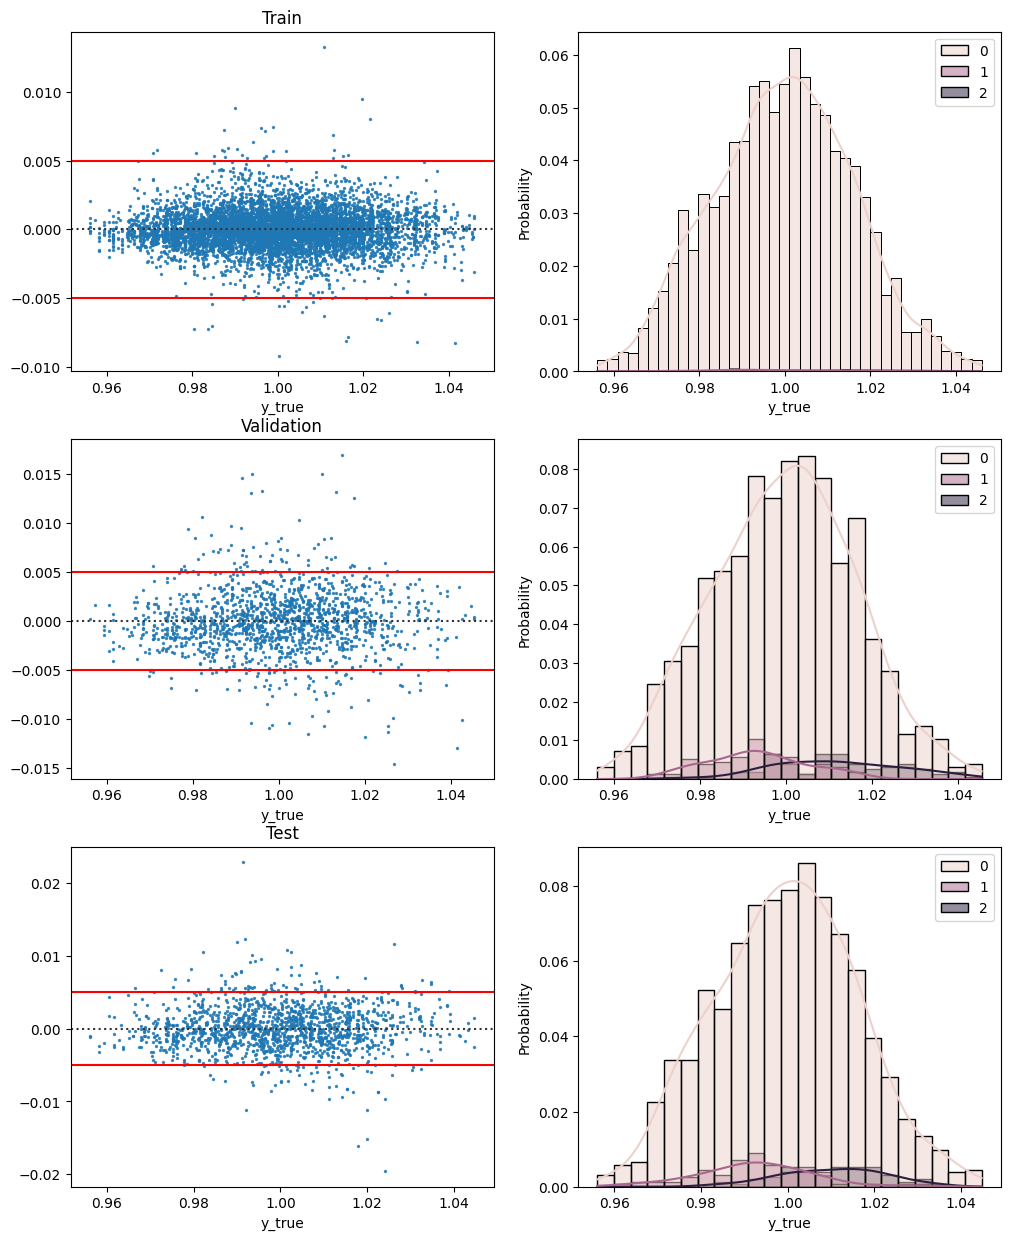

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(12, 5*3))
axes = axes.flatten()


residuals = df_train['y_pred_lgb'] - df_train['y_true']
sns.residplot(x=df_train['y_true'], y=residuals, line_kws={"color": "red", "lw": 2}, scatter_kws={'s': 2}, ax=axes[0])
# axes[0].set_ylim(-0.025, 0.04)
axes[0].set_title(f'Train')
axes[0].axhline(0.005, color='red')
axes[0].axhline(-0.005, color='red')

large_residuals = np.where(residuals >= 0.005, 1,
                            np.where(residuals <= -0.005, 2, 0))
sns.histplot(x=df_train['y_true'], hue=large_residuals, kde=True, stat='probability', ax=axes[1])


residuals = df_val['y_pred_lgb'] - df_val['y_true']
sns.residplot(x=df_val['y_true'], y=residuals, line_kws={"color": "red", "lw": 2}, scatter_kws={'s': 2}, ax=axes[2])
# axes[2].set_ylim(-0.025, 0.04)
axes[2].set_title(f'Validation')
axes[2].axhline(0.005, color='red')
axes[2].axhline(-0.005, color='red')

large_residuals = np.where(residuals >= 0.005, 1,
                            np.where(residuals <= -0.005, 2, 0))
sns.histplot(x=df_val['y_true'], hue=large_residuals, kde=True, stat='probability', ax=axes[3])


residuals = df_test['y_pred_lgb'] - df_test['y_true']
sns.residplot(x=df_test['y_true'], y=residuals, line_kws={"color": "red", "lw": 2}, scatter_kws={'s': 2}, ax=axes[4])
# axes[4].set_ylim(-0.025, 0.04)
axes[4].set_title(f'Test')
axes[4].axhline(0.005, color='red')
axes[4].axhline(-0.005, color='red')

large_residuals = np.where(residuals >= 0.005, 1,
                            np.where(residuals <= -0.005, 2, 0))
sns.histplot(x=df_test['y_true'], hue=large_residuals, kde=True, stat='probability', ax=axes[5])

plt.show()

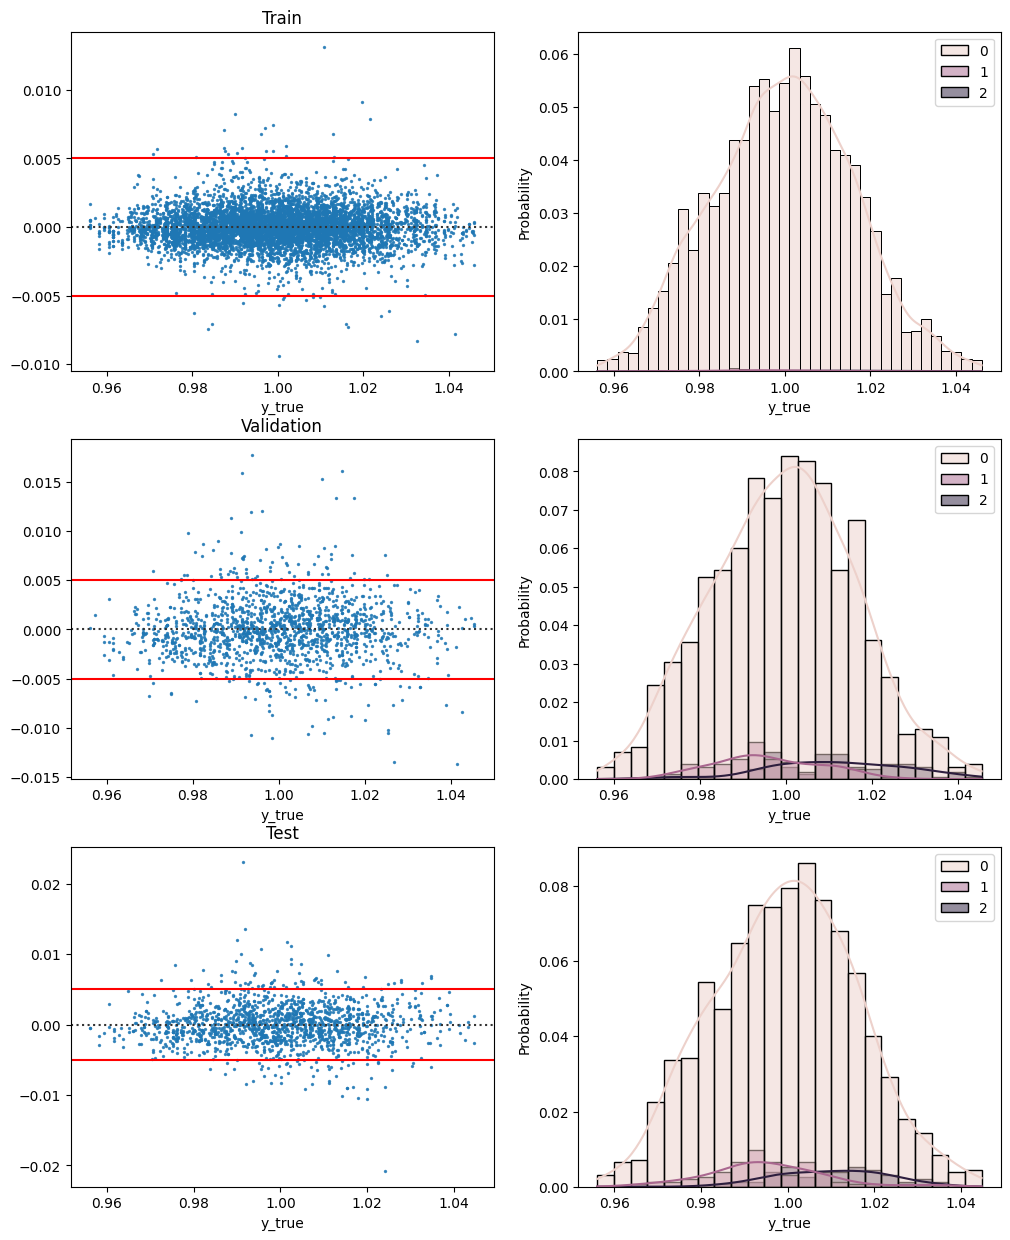

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(12, 5*3))
axes = axes.flatten()


residuals = df_train['y_pred'] - df_train['y_true']
sns.residplot(x=df_train['y_true'], y=residuals, line_kws={"color": "red", "lw": 2}, scatter_kws={'s': 2}, ax=axes[0])
# axes[0].set_ylim(-0.025, 0.04)
axes[0].set_title(f'Train')
axes[0].axhline(0.005, color='red')
axes[0].axhline(-0.005, color='red')

large_residuals = np.where(residuals >= 0.005, 1,
                            np.where(residuals <= -0.005, 2, 0))
sns.histplot(x=df_train['y_true'], hue=large_residuals, kde=True, stat='probability', ax=axes[1])


residuals = df_val['y_pred'] - df_val['y_true']
sns.residplot(x=df_val['y_true'], y=residuals, line_kws={"color": "red", "lw": 2}, scatter_kws={'s': 2}, ax=axes[2])
# axes[2].set_ylim(-0.025, 0.04)
axes[2].set_title(f'Validation')
axes[2].axhline(0.005, color='red')
axes[2].axhline(-0.005, color='red')

large_residuals = np.where(residuals >= 0.005, 1,
                            np.where(residuals <= -0.005, 2, 0))
sns.histplot(x=df_val['y_true'], hue=large_residuals, kde=True, stat='probability', ax=axes[3])


residuals = df_test['y_pred'] - df_test['y_true']
sns.residplot(x=df_test['y_true'], y=residuals, line_kws={"color": "red", "lw": 2}, scatter_kws={'s': 2}, ax=axes[4])
# axes[4].set_ylim(-0.025, 0.04)
axes[4].set_title(f'Test')
axes[4].axhline(0.005, color='red')
axes[4].axhline(-0.005, color='red')

large_residuals = np.where(residuals >= 0.005, 1,
                            np.where(residuals <= -0.005, 2, 0))
sns.histplot(x=df_test['y_true'], hue=large_residuals, kde=True, stat='probability', ax=axes[5])

plt.show()

## Submission 

In [ ]:
submission_data_path = '../Submission_template_UHI2025-v2.csv' 
test_file = pd.read_csv(submission_data_path)
test_file

Longitude   Latitude  UHI Index
0    -73.971665  40.788763        NaN
1    -73.971928  40.788875        NaN
2    -73.967080  40.789080        NaN
3    -73.972550  40.789082        NaN
4    -73.969697  40.787953        NaN
...         ...        ...        ...
1035 -73.919388  40.813803        NaN
1036 -73.931033  40.833178        NaN
1037 -73.934647  40.854542        NaN
1038 -73.917223  40.815413        NaN
1039 -73.911645  40.804402        NaN

[1040 rows x 3 columns]

In [ ]:
test_data = test_file.copy()

In [ ]:
data_folder = "../data_pipeline/data/tabular_data/submission/1x1"
for i, filename in tqdm(enumerate(os.listdir(data_folder))):
    if filename.endswith(".csv"):
        file_path = os.path.join(data_folder, filename)
        df = pd.read_csv(file_path)
        df = df.iloc[:, 2:]
        # print(df.columns)
        test_data = pd.concat([test_data, df], axis=1)


data_folder = "../data_pipeline/data/tabular_data/submission/3x3"
for i, filename in tqdm(enumerate(os.listdir(data_folder))):
    if filename.endswith(".csv"):
        file_path = os.path.join(data_folder, filename)
        df = pd.read_csv(file_path)
        df = df.iloc[:, 2:]
        # print(df.columns)
        test_data = pd.concat([test_data, df], axis=1)


data_folder = "../data_pipeline/data/tabular_data/submission/5x5"
for i, filename in tqdm(enumerate(os.listdir(data_folder))):
    if filename.endswith(".csv"):
        file_path = os.path.join(data_folder, filename)
        df = pd.read_csv(file_path)
        df = df.iloc[:, 2:]
        # print(df.columns)
        test_data = pd.concat([test_data, df], axis=1)


data_folder = "../data_pipeline/data/tabular_data/submission/9x9"
for i, filename in tqdm(enumerate(os.listdir(data_folder))):
    if filename.endswith(".csv"):
        file_path = os.path.join(data_folder, filename)
        df = pd.read_csv(file_path)
        df = df.iloc[:, 2:]
        # print(df.columns)
        test_data = pd.concat([test_data, df], axis=1)


data_folder = "../data_pipeline/data/tabular_data/submission/15x15"
for i, filename in tqdm(enumerate(os.listdir(data_folder))):
    if filename.endswith(".csv"):
        file_path = os.path.join(data_folder, filename)
        df = pd.read_csv(file_path)
        df = df.iloc[:, 2:]
        # print(df.columns)
        test_data = pd.concat([test_data, df], axis=1)


data_folder = "../data_pipeline/data/tabular_data/submission/25x25"
for i, filename in tqdm(enumerate(os.listdir(data_folder))):
    if filename.endswith(".csv"):
        file_path = os.path.join(data_folder, filename)
        df = pd.read_csv(file_path)
        df = df.iloc[:, 2:]
        # print(df.columns)
        test_data = pd.concat([test_data, df], axis=1)


data_folder = "../data_pipeline/data/tabular_data/submission/51x51"
for i, filename in tqdm(enumerate(os.listdir(data_folder))):
    if filename.endswith(".csv"):
        file_path = os.path.join(data_folder, filename)
        df = pd.read_csv(file_path)
        df = df.iloc[:, 2:]
        # print(df.columns)
        test_data = pd.concat([test_data, df], axis=1)

0it [00:00, ?it/s]

48it [00:00, 189.43it/s]
73it [00:00, 140.19it/s]
71it [00:01, 67.27it/s]
71it [00:01, 52.03it/s]
63it [00:01, 43.99it/s]
29it [00:00, 38.30it/s]
29it [00:00, 38.36it/s]


In [ ]:
pred = extree_pl.predict(test_data[numerical_cols + categorical_cols])
pred_lgbm = lgbm_pipeline3.predict(test_data[numerical_cols + categorical_cols])
pred_xgb = rfe_pipeline3.predict(test_data[numerical_cols + categorical_cols])

pred = p * pred + (1 - p) * pred_xgb

# pred25 = rfe_pipeline25.predict(test_data[[col for col in df_train.columns if col.endswith("25x25")]])
# res_pred = rfe_pipeline_res.predict(test_data[numerical_cols + categorical_cols])
# pred = pred + res_pred + pred25

final_predictions = pd.Series(pred)
submission_df = pd.DataFrame({'Longitude':test_file['Longitude'].values, 'Latitude':test_file['Latitude'].values, 'UHI Index':final_predictions.values})

In [ ]:
submission_df

Longitude   Latitude  UHI Index
0    -73.971665  40.788763   0.964438
1    -73.971928  40.788875   0.964359
2    -73.967080  40.789080   0.963791
3    -73.972550  40.789082   0.966102
4    -73.969697  40.787953   0.958535
...         ...        ...        ...
1035 -73.919388  40.813803   1.041792
1036 -73.931033  40.833178   1.043243
1037 -73.934647  40.854542   1.040187
1038 -73.917223  40.815413   1.038747
1039 -73.911645  40.804402   1.036531

[1040 rows x 3 columns]

In [ ]:
submission_df.to_csv("../submissions/extree_tuned2+xgb(p=0.9).csv", index = False)

## Residual Diagnose

In [ ]:
feature = get_feature_names(preprocessor, numerical_cols, categorical_cols)
imp_df = pd.DataFrame({'feature': feature, 'imp': xgb3.feature_importances_})
imp_df = imp_df.sort_values(by='imp', ascending=False)

In [ ]:
imp_df.T.to_dict()

{214: {'feature': 'no2_july24', 'imp': 0.21610750257968903},
 155: {'feature': 'hcho_july24', 'imp': 0.10165615379810333},
 198: {'feature': 'building_height_res100_std_dev_51x51',
  'imp': 0.08656983077526093},
 107: {'feature': 'canopy_heigth_res30_std_dev_51x51',
  'imp': 0.027164744213223457},
 247: {'feature': 'has_manufacture_res100_1.0', 'imp': 0.019268522039055824},
 166: {'feature': 'landsat_8_si_energy_51x51', 'imp': 0.019163882359862328},
 223: {'feature': 'building_year_res100_mean_15x15',
  'imp': 0.018347634002566338},
 241: {'feature': 'entropy_orientation_res1000', 'imp': 0.01808735728263855},
 73: {'feature': 'mean_circuity_res1000', 'imp': 0.016310926526784897},
 159: {'feature': 'co_july24', 'imp': 0.015004858374595642},
 248: {'feature': 'has_park_res100_1.0', 'imp': 0.01499168947339058},
 252: {'feature': 'has_park_res1000_1.0', 'imp': 0.014773640781641006},
 132: {'feature': 'aod55', 'imp': 0.01399734616279602},
 103: {'feature': 'landsat_8_si_ASM_51x51', 'imp': 0

In [ ]:
all_val = pd.concat([df_val, df_test], axis=0)

In [ ]:
import branca.colormap as cm

all_val['lat'] = ground_df['Latitude']
all_val['long'] = ground_df['Longitude']

all_val['residual'] = all_val['y_pred'] - all_val['y_true']
all_val['large_residuals'] = np.where(all_val['residual'] < -0.005, 1, 
                           np.where(all_val['residual'] > 0.005, 2, 0))

# bound = df_val[(df_val['y_true'] >= 0.98) & (df_val['y_true'] <= 1)].copy()




m = folium.Map(location=[40.8, -73.5], zoom_start=7)

colormap = cm.LinearColormap(["green", "yellow", "red"], vmin=all_val['large_residuals'].min(), vmax=all_val['large_residuals'].max())
# Add points
for _, row in all_val.iterrows():

    folium.CircleMarker(
        location=[row["lat"], row["long"]],
        radius=1,
        color=colormap(row['large_residuals']), 
        fill=True,
        fill_opacity=0.7,
        tooltip=_,
    ).add_to(m)

colormap.add_to(m)

m

In [ ]:
import branca.colormap as cm

# df_test['lat'] = ground_df['Latitude']
# df_test['long'] = ground_df['Longitude']

# df_test['residual'] = df_test['y_pred'] - df_test['y_true']
# df_val['large_residuals'] = np.where(df_val['residual'] < -0.005, 1, 
#                            np.where(df_val['residual'] > 0.005, 2, 0))

bound = all_val.copy()
# [(all_val['y_true'] >= 0.98) & (all_val['y_true'] <= 1.02)].copy()




m = folium.Map(location=[40.8, -73.5], zoom_start=7)

colormap = cm.LinearColormap(["green", "yellow", "red"], vmin=all_val['residual'].min(), vmax=all_val['residual'].max())
# Add points
for _, row in all_val.iterrows():

    folium.CircleMarker(
        location=[row["lat"], row["long"]],
        radius=1,
        color=colormap(row['residual']), 
        fill=True,
        fill_opacity=0.7,
        tooltip=_,
    ).add_to(m)

colormap.add_to(m)

m

In [ ]:
all_val.loc[[2253, 2252], :].to_dict()

KeyError: "None of [Index([2253, 2252], dtype='int32')] are in the [index]"